<a href="https://colab.research.google.com/github/jacksonsin/data_science_with_python/blob/main/Task_1_Data_Processing_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
!pip install dython
from dython import nominal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Task 1 - Load the data into a pandas data frame with the appropriate columns

In [2]:
# Load dataset
df = pd.read_csv("/content/TL_applicants_task_plants.csv")
df.head()

,Unnamed: 0,0,1
0,0,5657.0,10526:Menyanthaceae:P
1,1,9594.0,10399:Cyclanthaceae:P
2,2,138.0,10691:Myristicaceae:S
3,3,4339.0,10521:Limnanthaceae:P
4,4,9070.0,10902:Aphanopetalaceae:P~8777:Onagraceae:S


In [3]:
# Check shape of the dataframe
df.shape

(57, 3)

In [4]:
# Drop the first column
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.head()

,0,1
0,5657.0,10526:Menyanthaceae:P
1,9594.0,10399:Cyclanthaceae:P
2,138.0,10691:Myristicaceae:S
3,4339.0,10521:Limnanthaceae:P
4,9070.0,10902:Aphanopetalaceae:P~8777:Onagraceae:S


In [5]:
# All object types seems okay
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       57 non-null     float64
 1   1       51 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.0+ KB


In [6]:
# Sample check 
df.loc[11][1]

'10516:Juglandaceae:P~8777:Onagraceae:S~10518:Drosophyllaceae:S'

In [7]:
# Separate by multiple delimiters
df1 = df["1"].str.split('[:~]',expand=True).rename(columns=lambda x: f'col{x+1}')
df1.head(20)

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
0,10526,Menyanthaceae,P,None,None,None,None,None,None,None,None,None
1,10399,Cyclanthaceae,P,None,None,None,None,None,None,None,None,None
2,10691,Myristicaceae,S,None,None,None,None,None,None,None,None,None
3,10521,Limnanthaceae,P,None,None,None,None,None,None,None,None,None
4,10902,Aphanopetalaceae,P,8777,Onagraceae,S,None,None,None,None,None,None
5,9947,Resedaceae,P,10915,Annonaceae,S,None,None,None,None,None,None
6,10989,Philydraceae,P,10540,Corsiaceae,P,10543,Talinaceae,S,None,None,None
7,8777,Onagraceae,S,None,None,None,None,None,None,None,None,None
8,10689,Lactoridaceae,P,None,None,None,None,None,None,None,None,None
9,10518,Drosophyllaceae,P,None,None,None,None,None,None,None,None,None


In [8]:
# Rename DataFrame
df1 = df1.rename(columns={"col1":"Plant1_ID","col2":"Plant1_Name","col3":"Plant1_Condition",
                          "col4":"Plant2_ID","col5":"Plant2_Name","col6":"Plant2_Condition",
                          "col7":"Plant3_ID","col8":"Plant3_Name","col9":"Plant3_Condition",
                          "col10":"Plant4_ID","col11":"Plant4_Name","col12":"Plant4_Condition"}, errors="raise")
df1.head()

,Plant1_ID,Plant1_Name,Plant1_Condition,Plant2_ID,Plant2_Name,Plant2_Condition,Plant3_ID,Plant3_Name,Plant3_Condition,Plant4_ID,Plant4_Name,Plant4_Condition
0,10526,Menyanthaceae,P,None,None,None,None,None,None,None,None,None
1,10399,Cyclanthaceae,P,None,None,None,None,None,None,None,None,None
2,10691,Myristicaceae,S,None,None,None,None,None,None,None,None,None
3,10521,Limnanthaceae,P,None,None,None,None,None,None,None,None,None
4,10902,Aphanopetalaceae,P,8777,Onagraceae,S,None,None,None,None,None,None


In [9]:
# Create DataFrame for People ID and convert into string
df0 = df["0"].astype('str').rename("ID")
df0.head()

0    5657.0
1    9594.0
2     138.0
3    4339.0
4    9070.0
Name: ID, dtype: object

In [10]:
# Strip the decimal
df0 = df0.str.rstrip('.0').to_frame()
df0.head()

,ID
0,5657
1,9594
2,138
3,4339
4,907


In [11]:
# Merge 2 DataFrames
dataset = pd.concat([df0,df1], axis=1)

In [12]:
# Check object types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                57 non-null     object
 1   Plant1_ID         51 non-null     object
 2   Plant1_Name       51 non-null     object
 3   Plant1_Condition  51 non-null     object
 4   Plant2_ID         15 non-null     object
 5   Plant2_Name       15 non-null     object
 6   Plant2_Condition  15 non-null     object
 7   Plant3_ID         8 non-null      object
 8   Plant3_Name       7 non-null      object
 9   Plant3_Condition  7 non-null      object
 10  Plant4_ID         2 non-null      object
 11  Plant4_Name       2 non-null      object
 12  Plant4_Condition  2 non-null      object
dtypes: object(13)
memory usage: 5.9+ KB


In [13]:
# Change data type
dataset = dataset.astype({'Plant1_Condition': 'category',
                          'Plant2_Condition': 'category',
                          'Plant3_Condition': 'category',
                          'Plant4_Condition': 'category'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                57 non-null     object  
 1   Plant1_ID         51 non-null     object  
 2   Plant1_Name       51 non-null     object  
 3   Plant1_Condition  51 non-null     category
 4   Plant2_ID         15 non-null     object  
 5   Plant2_Name       15 non-null     object  
 6   Plant2_Condition  15 non-null     category
 7   Plant3_ID         8 non-null      object  
 8   Plant3_Name       7 non-null      object  
 9   Plant3_Condition  7 non-null      category
 10  Plant4_ID         2 non-null      object  
 11  Plant4_Name       2 non-null      object  
 12  Plant4_Condition  2 non-null      category
dtypes: category(4), object(9)
memory usage: 4.8+ KB


# Task 2 -Write algorithms to find and report any inconsistencies in the data. E.g. people with missing plants, the same plant ID corresponding to two different plants, or other irregularities.


# Check for Missing Data

In [14]:
dataset.isnull().sum()

ID                   0
Plant1_ID            6
Plant1_Name          6
Plant1_Condition     6
Plant2_ID           42
Plant2_Name         42
Plant2_Condition    42
Plant3_ID           49
Plant3_Name         50
Plant3_Condition    50
Plant4_ID           55
Plant4_Name         55
Plant4_Condition    55
dtype: int64

In [15]:
# Check IDs with missing plant 1
total_id = len(dataset[dataset["Plant1_Name"].isnull()]["ID"])
print(f"Total number of IDs with missing plant 1: {total_id}")
print(dataset[dataset["Plant1_Name"].isnull()]["ID"].astype("int32").sort_values(ascending=True).tolist())

Total number of IDs with missing plant 1: 6
[101, 785, 3688, 5207, 7784, 8815]


In [16]:
# Check IDs with missing plant 2
total_id = len(dataset[dataset["Plant2_Name"].isnull()]["ID"])
print(f"Total number of IDs with missing plant 2: {total_id}")
print(dataset[dataset["Plant2_Name"].isnull()]["ID"].astype("int32").sort_values(ascending=True).tolist())

Total number of IDs with missing plant 2: 42
[31, 87, 101, 138, 459, 586, 642, 785, 855, 871, 898, 1169, 1376, 1487, 2064, 3287, 3483, 3688, 3775, 3893, 4339, 4626, 5041, 5207, 5515, 5599, 5657, 5673, 5847, 5952, 6218, 6862, 7693, 7784, 8096, 8481, 8802, 8815, 9188, 9594, 9606, 9718]


In [17]:
# Check IDs with missing plant 2
total_id = len(dataset[dataset["Plant2_Name"].notnull()]["ID"])
print(f"Total number of IDs with missing plant 2: {total_id}")
print(dataset[dataset["Plant2_Name"].notnull()]["ID"].astype("int32").sort_values(ascending=True).tolist())

Total number of IDs with missing plant 2: 15
[138, 252, 352, 437, 517, 907, 1061, 1146, 1152, 1714, 2437, 3708, 5037, 7812, 8725]


In [18]:
# Check IDs with missing plant 3
total_id = len(dataset[dataset["Plant2_Name"].isnull()]["ID"])
print(f"Total number of IDs with missing plant 3: {total_id}")
print(dataset[dataset["Plant3_Name"].isnull()]["ID"].astype("int32").sort_values(ascending=True).tolist())

Total number of IDs with missing plant 3: 42
[31, 87, 101, 138, 252, 352, 459, 586, 642, 785, 855, 871, 898, 907, 1061, 1152, 1169, 1376, 1487, 1714, 2064, 3287, 3483, 3688, 3775, 3893, 4339, 4626, 5037, 5041, 5207, 5515, 5599, 5657, 5673, 5847, 5952, 6218, 6862, 7693, 7784, 7812, 8096, 8481, 8802, 8815, 9188, 9594, 9606, 9718]


In [19]:
# Check IDs with missing plant 4
total_id = len(dataset[dataset["Plant4_Name"].isnull()]["ID"])
print(f"Total number of IDs with missing plant 4: {total_id}")
print(dataset[dataset["Plant4_Name"].isnull()]["ID"].astype("int32").sort_values(ascending=True).tolist())

Total number of IDs with missing plant 4: 55
[31, 87, 101, 138, 252, 352, 437, 459, 517, 586, 642, 785, 855, 871, 898, 907, 1061, 1152, 1169, 1376, 1487, 1714, 2064, 2437, 3287, 3483, 3688, 3708, 3775, 3893, 4339, 4626, 5037, 5041, 5207, 5515, 5599, 5657, 5673, 5847, 5952, 6218, 6862, 7693, 7784, 7812, 8096, 8481, 8725, 8802, 8815, 9188, 9594, 9606, 9718]


# Task 3. Clean the data based on what you found, in a way you find appropriate. Explain what you have done.

In [20]:
# Check number of rows
dataset['ID'].shape

(57,)

In [21]:
# Check any duplicates in ID
dataset['ID'].duplicated().sum()

1

In [22]:
# Pull the record with duplicate
dataset[dataset['ID'].duplicated()]

,ID,Plant1_ID,Plant1_Name,Plant1_Condition,Plant2_ID,Plant2_Name,Plant2_Condition,Plant3_ID,Plant3_Name,Plant3_Condition,Plant4_ID,Plant4_Name,Plant4_Condition
22,138,8781,Canellaceae,S,8777,Onagraceae,S,10507,Petermanniaceae,P,10514,Asparagaceae,S


In [23]:
# Double check in the records
dataset["ID"].astype("int32").to_frame().sort_values(by=['ID']).duplicated()

15    False
54    False
40    False
2     False
22     True
5     False
26    False
16    False
37    False
11    False
42    False
19    False
20    False
49    False
44    False
56    False
4     False
14    False
28    False
36    False
13    False
29    False
50    False
12    False
55    False
21    False
7     False
25    False
35    False
6     False
23    False
46    False
3     False
27    False
52    False
8     False
18    False
48    False
39    False
0     False
30    False
33    False
24    False
31    False
17    False
43    False
34    False
53    False
51    False
10    False
41    False
9     False
32    False
45    False
1     False
38    False
47    False
dtype: bool

In [24]:
# Drop duplicates in ID
df_filtered = dataset.drop_duplicates(subset=['ID'])
df_filtered.shape

(56, 13)

In [25]:
# Replace any error data with NaN
df_replaced = df_filtered.fillna(np.nan)
df_replaced = df_replaced.replace(to_replace=r'', value=np.NaN, regex=True)
df_replaced

,ID,Plant1_ID,Plant1_Name,Plant1_Condition,Plant2_ID,Plant2_Name,Plant2_Condition,Plant3_ID,Plant3_Name,Plant3_Condition,Plant4_ID,Plant4_Name,Plant4_Condition
0,5657,10526,Menyanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9594,10399,Cyclanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,138,10691,Myristicaceae,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4339,10521,Limnanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,907,10902,Aphanopetalaceae,P,8777,Onagraceae,S,NaN,NaN,NaN,NaN,NaN,NaN
5,252,9947,Resedaceae,P,10915,Annonaceae,S,NaN,NaN,NaN,NaN,NaN,NaN
6,3708,10989,Philydraceae,P,10540,Corsiaceae,P,10543,Talinaceae,S,NaN,NaN,NaN
7,3287,8777,Onagraceae,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5041,10689,Lactoridaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8802,10518,Drosophyllaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Drop NAs from columns: Plant1_ID and Plant1_Name
clean_df = df_replaced.dropna(subset=['Plant1_ID','Plant1_Name'])
clean_df

,ID,Plant1_ID,Plant1_Name,Plant1_Condition,Plant2_ID,Plant2_Name,Plant2_Condition,Plant3_ID,Plant3_Name,Plant3_Condition,Plant4_ID,Plant4_Name,Plant4_Condition
0,5657,10526,Menyanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9594,10399,Cyclanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,138,10691,Myristicaceae,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4339,10521,Limnanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,907,10902,Aphanopetalaceae,P,8777,Onagraceae,S,NaN,NaN,NaN,NaN,NaN,NaN
5,252,9947,Resedaceae,P,10915,Annonaceae,S,NaN,NaN,NaN,NaN,NaN,NaN
6,3708,10989,Philydraceae,P,10540,Corsiaceae,P,10543,Talinaceae,S,NaN,NaN,NaN
7,3287,8777,Onagraceae,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5041,10689,Lactoridaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8802,10518,Drosophyllaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 4 -	Sort the people by the number of plants they have.

In [27]:
# Extract columns: people ID and plant ID
df_extracted = clean_df.iloc[:,[1,4,7,10]]
df_extracted.head()

,Plant1_ID,Plant2_ID,Plant3_ID,Plant4_ID
0,10526,NaN,NaN,NaN
1,10399,NaN,NaN,NaN
2,10691,NaN,NaN,NaN
3,10521,NaN,NaN,NaN
4,10902,8777,NaN,NaN


In [28]:
# Check total plants own then sort by descending order
clean_df["Total Plants Own"] = df_extracted.apply(lambda x: x.notna().sum(), axis=1)
clean_df.sort_values(by=['Total Plants Own'], ascending=False).reset_index(drop=True)
clean_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Plant1_ID,Plant1_Name,Plant1_Condition,Plant2_ID,Plant2_Name,Plant2_Condition,Plant3_ID,Plant3_Name,Plant3_Condition,Plant4_ID,Plant4_Name,Plant4_Condition,Total Plants Own
0,5657,10526,Menyanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,9594,10399,Cyclanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,138,10691,Myristicaceae,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4339,10521,Limnanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,907,10902,Aphanopetalaceae,P,8777,Onagraceae,S,NaN,NaN,NaN,NaN,NaN,NaN,2


# Task 5: Export the cleaned and sorted data (all columns) as a json file with an appropriate structure.

In [29]:
# Convert to JSON format
data = clean_df.to_json(orient='index')
print(data)

{"0":{"ID":"5657","Plant1_ID":"10526","Plant1_Name":"Menyanthaceae","Plant1_Condition":"P","Plant2_ID":null,"Plant2_Name":null,"Plant2_Condition":null,"Plant3_ID":null,"Plant3_Name":null,"Plant3_Condition":null,"Plant4_ID":null,"Plant4_Name":null,"Plant4_Condition":null,"Total Plants Own":1},"1":{"ID":"9594","Plant1_ID":"10399","Plant1_Name":"Cyclanthaceae","Plant1_Condition":"P","Plant2_ID":null,"Plant2_Name":null,"Plant2_Condition":null,"Plant3_ID":null,"Plant3_Name":null,"Plant3_Condition":null,"Plant4_ID":null,"Plant4_Name":null,"Plant4_Condition":null,"Total Plants Own":1},"2":{"ID":"138","Plant1_ID":"10691","Plant1_Name":"Myristicaceae","Plant1_Condition":"S","Plant2_ID":null,"Plant2_Name":null,"Plant2_Condition":null,"Plant3_ID":null,"Plant3_Name":null,"Plant3_Condition":null,"Plant4_ID":null,"Plant4_Name":null,"Plant4_Condition":null,"Total Plants Own":1},"3":{"ID":"4339","Plant1_ID":"10521","Plant1_Name":"Limnanthaceae","Plant1_Condition":"P","Plant2_ID":null,"Plant2_Name":nul

In [30]:
#Export JSON file
with open('cleaned_data.json', 'w') as outfile:
    outfile.write(data)

# Task 6:	Create a pie chart that shows the proportion of plants with different conditions. Visualize the distribution of the number of plants a person has.

In [31]:
# Quick check on dataframe
clean_df.head()

,ID,Plant1_ID,Plant1_Name,Plant1_Condition,Plant2_ID,Plant2_Name,Plant2_Condition,Plant3_ID,Plant3_Name,Plant3_Condition,Plant4_ID,Plant4_Name,Plant4_Condition,Total Plants Own
0,5657,10526,Menyanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,9594,10399,Cyclanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,138,10691,Myristicaceae,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4339,10521,Limnanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,907,10902,Aphanopetalaceae,P,8777,Onagraceae,S,NaN,NaN,NaN,NaN,NaN,NaN,2


# Data formatting for Pie Chart 1

In [32]:
# Aggregate Data
piechart1 = clean_df.groupby(by=["Plant1_Condition"], dropna=True).sum().sort_values(by=['Total Plants Own'],ascending=False).reset_index()
piechart1

,Plant1_Condition,Total Plants Own
0,P,45
1,S,23
2,Q,2


# Pie Chart for Plant 1

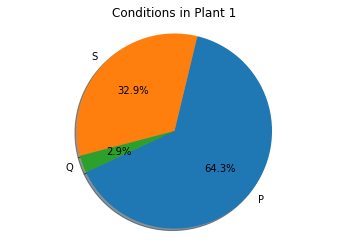

In [33]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = piechart1["Plant1_Condition"]
sizes = piechart1["Total Plants Own"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=205)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Conditions in Plant 1")
plt.show()

# Data formatting for Pie Chart 2

In [34]:
# Aggregate Data
piechart2 = clean_df.groupby(by=["Plant2_Condition"], dropna=True).sum().sort_values(by=['Total Plants Own'],ascending=False).reset_index()
piechart2

,Plant2_Condition,Total Plants Own
0,S,30
1,P,3


# Pie Chart for Plant 2

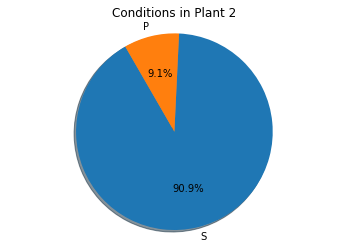

In [35]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = piechart2["Plant2_Condition"]
sizes = piechart2["Total Plants Own"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Conditions in Plant 2")
plt.show()

# Data formatting for Pie Chart 3

In [36]:
# Aggregate Data
piechart3 = clean_df.groupby(by=["Plant3_Condition"], dropna=True).sum().sort_values(by=['Total Plants Own'],ascending=False).reset_index()
piechart3

,Plant3_Condition,Total Plants Own
0,S,19
1,P,0


# Pie Chart for Plant 3

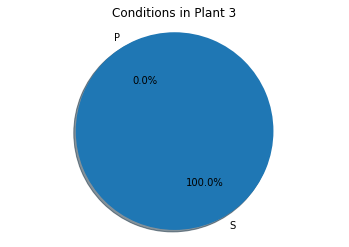

In [37]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = piechart3["Plant3_Condition"]
sizes = piechart3["Total Plants Own"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Conditions in Plant 3")
plt.show()

# Data formatting for Pie Chart 4

In [38]:
# Aggregate Data
piechart4 = clean_df.groupby(by=["Plant4_Condition"], dropna=True).sum().sort_values(by=['Total Plants Own'],ascending=False).reset_index()
piechart4

,Plant4_Condition,Total Plants Own
0,S,4


# Pie Chart for Plant 4

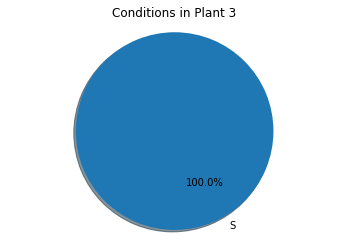

In [39]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = piechart4["Plant4_Condition"]
sizes = piechart4["Total Plants Own"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Conditions in Plant 3")
plt.show()

# Task 7 - Is there a relationship between the number of plants a person has and the condition of these plants? Can you visualize it?

In [40]:
# Quick check on the dataframe
clean_df.head()

,ID,Plant1_ID,Plant1_Name,Plant1_Condition,Plant2_ID,Plant2_Name,Plant2_Condition,Plant3_ID,Plant3_Name,Plant3_Condition,Plant4_ID,Plant4_Name,Plant4_Condition,Total Plants Own
0,5657,10526,Menyanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,9594,10399,Cyclanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,138,10691,Myristicaceae,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4339,10521,Limnanthaceae,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,907,10902,Aphanopetalaceae,P,8777,Onagraceae,S,NaN,NaN,NaN,NaN,NaN,NaN,2


# Relationship between different conditions of Plant 1 and Total Plant Own

In [41]:
# Extract relevant columns
plant1 = clean_df[["Plant1_Condition","Total Plants Own"]]

In [42]:
# Check object type Plant1_Condition
type(clean_df["Plant1_Condition"][0])

str

In [43]:
# Check object type for Total Plants Own
type(clean_df["Total Plants Own"][0])

numpy.int64

In [44]:
# Convert into dummies
dummies_df = pd.get_dummies(plant1, columns=['Plant1_Condition'])
dummies_df.head()

,Total Plants Own,Plant1_Condition_P,Plant1_Condition_Q,Plant1_Condition_S
0,1,1,0,0
1,1,1,0,0
2,1,0,0,1
3,1,1,0,0
4,2,1,0,0


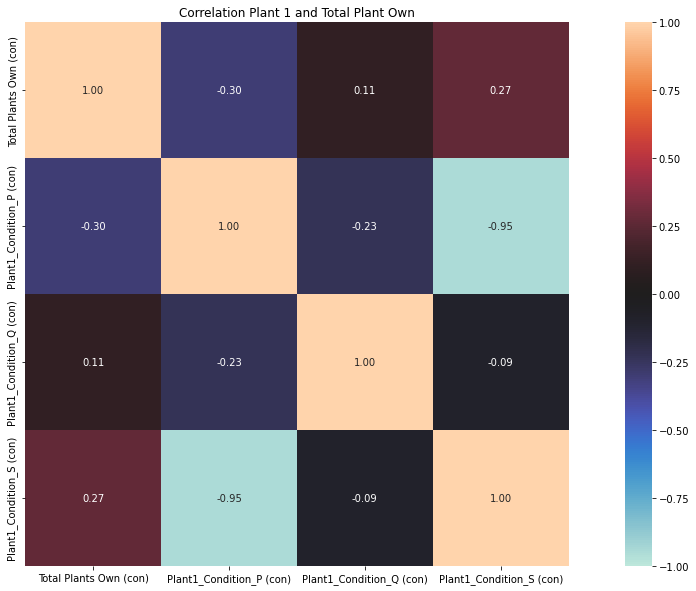

{'ax': <AxesSubplot:title={'center':'Correlation Plant 1 and Total Plant Own'}>,
 'corr':                           Total Plants Own (con)  Plant1_Condition_P (con)  \
 Total Plants Own (con)                  1.000000                 -0.298807   
 Plant1_Condition_P (con)               -0.298807                  1.000000   
 Plant1_Condition_Q (con)                0.109109                 -0.228218   
 Plant1_Condition_S (con)                0.270807                 -0.950146   
 
                           Plant1_Condition_Q (con)  Plant1_Condition_S (con)  
 Total Plants Own (con)                    0.109109                  0.270807  
 Plant1_Condition_P (con)                 -0.228218                 -0.950146  
 Plant1_Condition_Q (con)                  1.000000                 -0.086736  
 Plant1_Condition_S (con)                 -0.086736                  1.000000  }

In [45]:
# Correlation Plot
nominal.associations(dummies_df,figsize=(20,10),mark_columns=True,title="Correlation Plant 1 and Total Plant Own")

**Result**: There is a very strong negative correlation between Plant 1 Condition P and Plant 1 Condition S

# Relationship between different conditions of Plant 2 and Total Plant Own

In [46]:
# Extract relevant columns
plant2 = clean_df[["Plant2_Condition","Total Plants Own"]]

In [47]:
# Convert into dummies
dummies_df = pd.get_dummies(plant2, columns=['Plant2_Condition'])
dummies_df.head()

,Total Plants Own,Plant2_Condition_P,Plant2_Condition_S
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,2,0,1


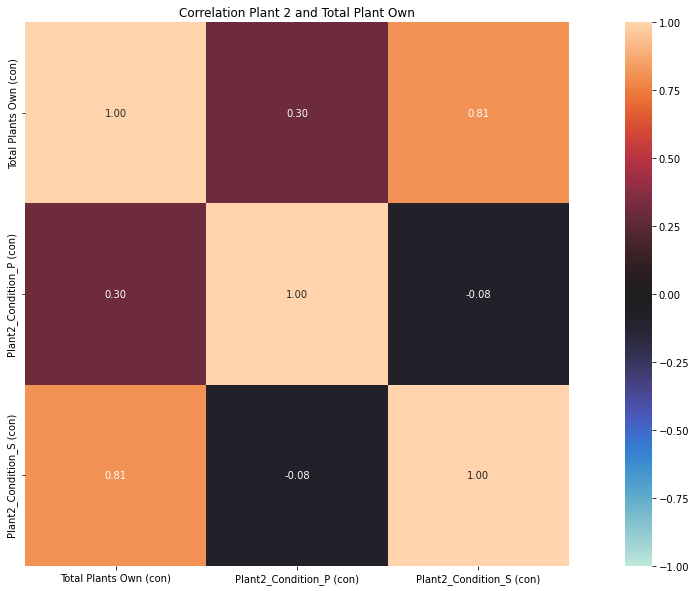

{'ax': <AxesSubplot:title={'center':'Correlation Plant 2 and Total Plant Own'}>,
 'corr':                           Total Plants Own (con)  Plant2_Condition_P (con)  \
 Total Plants Own (con)                  1.000000                  0.300050   
 Plant2_Condition_P (con)                0.300050                  1.000000   
 Plant2_Condition_S (con)                0.807183                 -0.082199   
 
                           Plant2_Condition_S (con)  
 Total Plants Own (con)                    0.807183  
 Plant2_Condition_P (con)                 -0.082199  
 Plant2_Condition_S (con)                  1.000000  }

In [48]:
# Correlation Plot
nominal.associations(dummies_df,figsize=(20,10),mark_columns=True,title="Correlation Plant 2 and Total Plant Own")

**Result**: There is a very strong positive correlation between Plant 2 Condition S and Total Plant Own

# Relationship between different conditions of Plant 3 and Total Plant Own

In [49]:
# Extract relevant columns
plant3 = clean_df[["Plant3_Condition","Total Plants Own"]]

In [50]:
# Convert into dummies
dummies_df = pd.get_dummies(plant3, columns=['Plant3_Condition'])
dummies_df.head()

,Total Plants Own,Plant3_Condition_P,Plant3_Condition_S
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,2,0,0


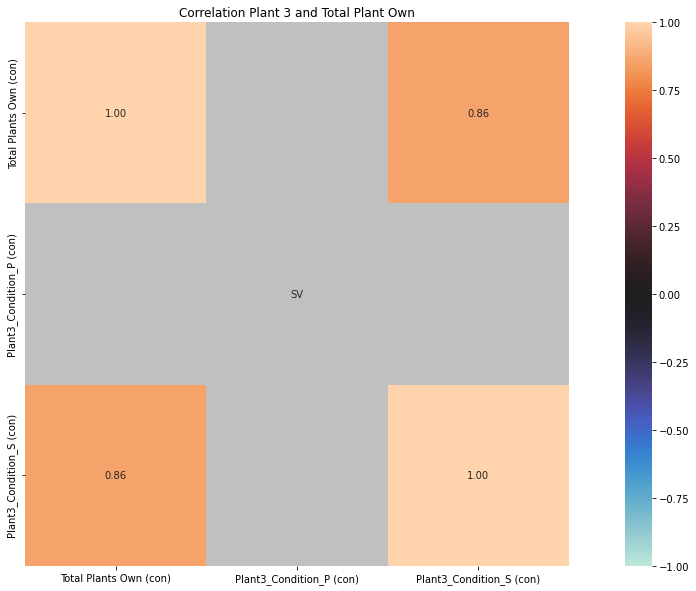

{'ax': <AxesSubplot:title={'center':'Correlation Plant 3 and Total Plant Own'}>,
 'corr':                           Total Plants Own (con)  Plant3_Condition_P (con)  \
 Total Plants Own (con)                  1.000000                       0.0   
 Plant3_Condition_P (con)                0.000000                       0.0   
 Plant3_Condition_S (con)                0.858883                       0.0   
 
                           Plant3_Condition_S (con)  
 Total Plants Own (con)                    0.858883  
 Plant3_Condition_P (con)                  0.000000  
 Plant3_Condition_S (con)                  1.000000  }

In [51]:
# Correlation Plot
nominal.associations(dummies_df,figsize=(20,10),mark_columns=True,title="Correlation Plant 3 and Total Plant Own")

**Result**: There is a very strong positive correlation between Plant 3 Condition S and Total Plant Own

# Relationship between different conditions of Plant 4 and Total Plant Own

In [52]:
# Extract relevant columns
plant4 = clean_df[["Plant4_Condition","Total Plants Own"]]

In [53]:
# Convert into dummies
dummies_df = pd.get_dummies(plant4, columns=['Plant4_Condition'])
dummies_df.head()

,Total Plants Own,Plant4_Condition_S
0,1,0
1,1,0
2,1,0
3,1,0
4,2,0


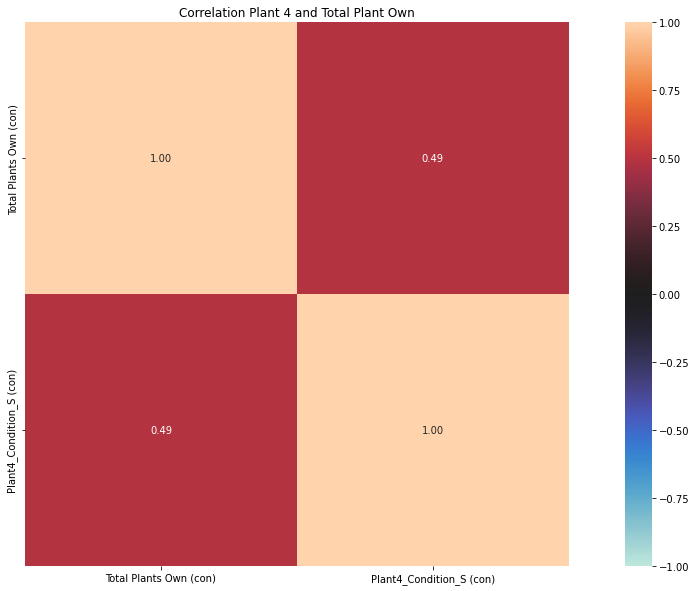

{'ax': <AxesSubplot:title={'center':'Correlation Plant 4 and Total Plant Own'}>,
 'corr':                           Total Plants Own (con)  Plant4_Condition_S (con)
 Total Plants Own (con)                   1.00000                   0.49099
 Plant4_Condition_S (con)                 0.49099                   1.00000}

In [54]:
# Correlation Plot
nominal.associations(dummies_df,figsize=(20,10),mark_columns=True,title="Correlation Plant 4 and Total Plant Own")

**Result**: There is a positive correlation between Plant 4 Condition S and Total Plant Own